# Outlier Detection and Removal using Cluster Analysis


## Introduction

In this analysis, we utilize cluster analysis, specifically the K-Means algorithm, for outlier detection and removal in a dataset obtained from Kaggle. The dataset, available at [Kaggle - Weight and Height Data (Outlier Detection)](https://www.kaggle.com/datasets/krishnaraj30/weight-and-height-data-outlier-detection), contains information about gender, height, and weight. The goal is to group similar data points together and identify potential outliers that deviate significantly from their assigned clusters.

## Data Loading and Overview

Load the dataset from Kaggle and gain insights into its structure and content. Understanding the basic characteristics of the data is crucial before proceeding with any analysis.

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

#### Load the dataset

In [2]:
data = pd.read_csv("weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Display basic information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### Visualization - Distribution of Numeric Features

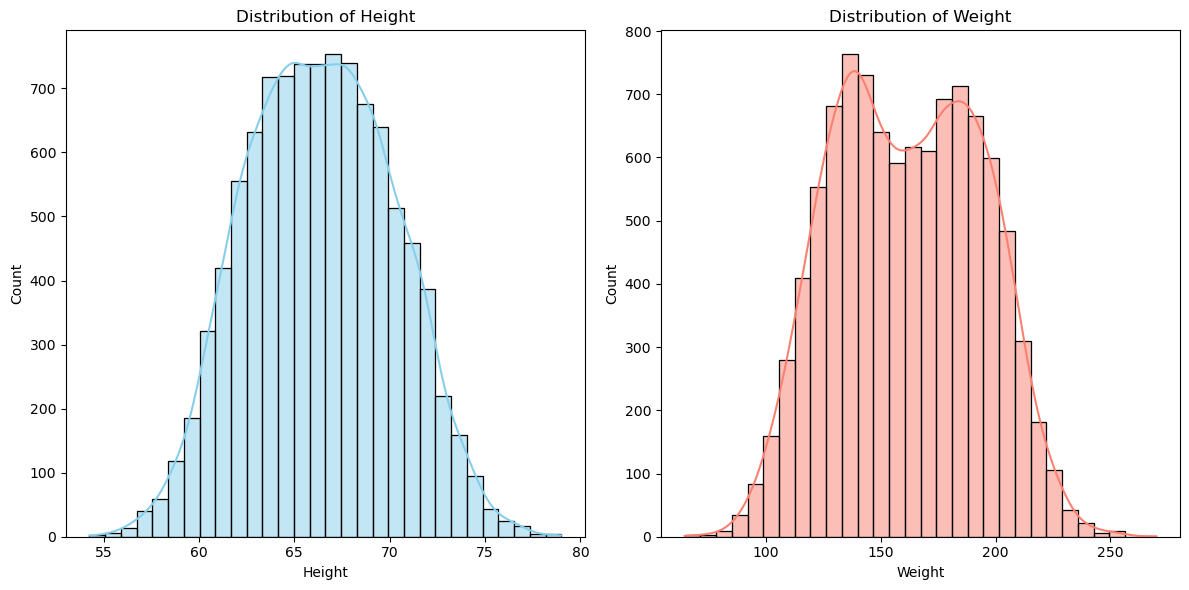

In [6]:
# Distribution of Height and Weight
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Height'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Height')

plt.subplot(1, 2, 2)
sns.histplot(data['Weight'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()


## Data Preprocessing
Ensure the dataset is ready for clustering by addressing missing values, handling duplicates, and scaling numerical features. This step is essential for the effectiveness of the subsequent clustering process.

#### Check for missing values

In [7]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

#### Check for duplicates

In [8]:
data.duplicated().sum()

0

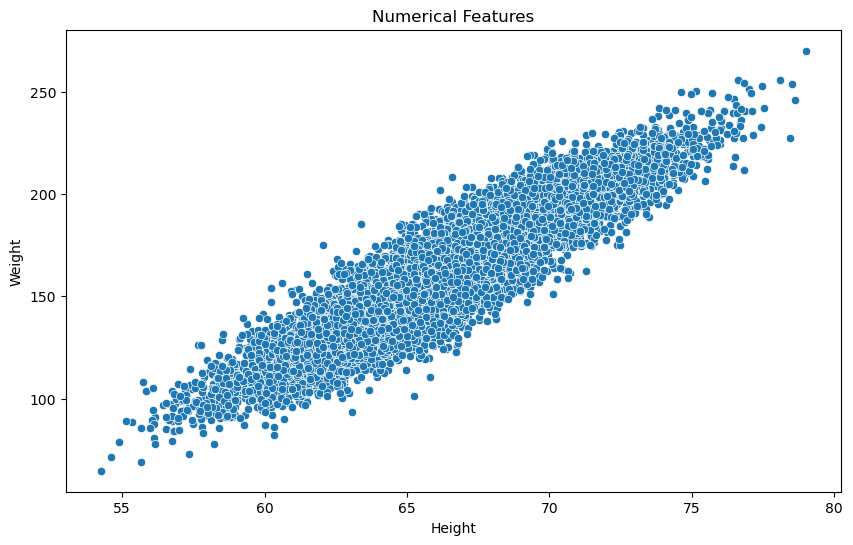

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Height'], y=data['Weight'])
plt.title('Numerical Features')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### Scale numerical features

In [10]:
scaler = StandardScaler()
data[['Height', 'Weight']] = scaler.fit_transform(data[['Height', 'Weight']])

In [11]:
data

,Gender,Height,Weight
0,Male,1.944061,2.505797
1,Male,0.627537,0.027101
2,Male,2.012443,1.597806
3,Male,1.394060,1.825222
4,Male,0.913421,1.398750
...,...,...,...
9995,Female,-0.050660,-0.768151
9996,Female,0.181839,0.293631
9997,Female,-0.649688,-1.026730
9998,Female,0.693125,0.075127


#### Visualization of the scaled features

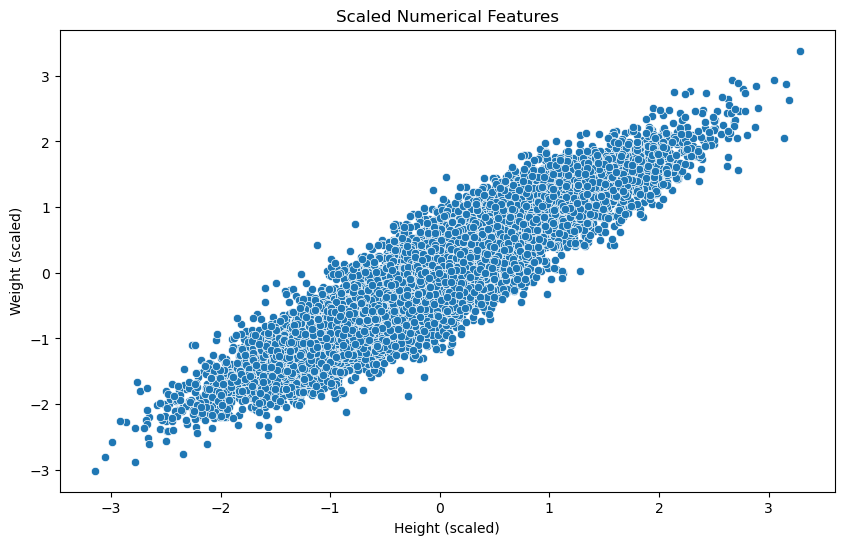

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Height"], y=data["Weight"])
plt.title('Scaled Numerical Features')
plt.xlabel('Height (scaled)')
plt.ylabel('Weight (scaled)')
plt.show()

## Applying K-Means Clustering
Utilize the K-Means clustering algorithm to group data points based on their similarities. Experiment with different numbers of clusters to find an optimal configuration for the given data.

#### Determine Optimal Number of Clusters (K)

In [13]:
# Elbow Method to find the optimal number of clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['Height', 'Weight']])
    wcss.append(kmeans.inertia_)

C:\Users\Francis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Francis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Francis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Francis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Francis\anaconda3\lib\site-packages\skl

#### Plot the Elbow Method

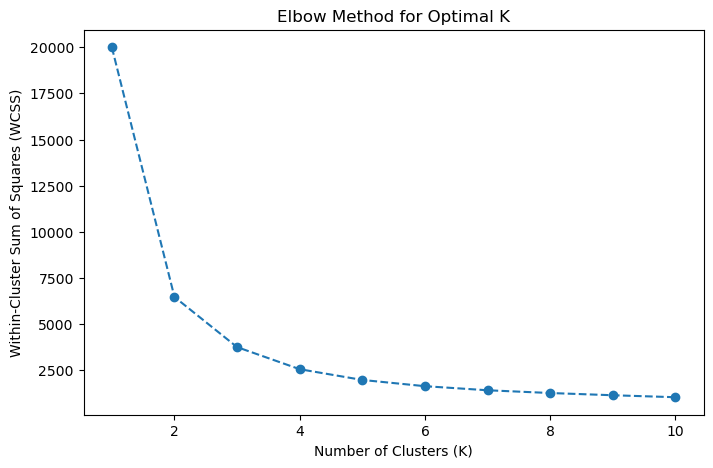

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

#### Select the number of clusters

In [15]:
n_clusters = 3

#### Fit K-Means model

In [16]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Height', 'Weight']])

C:\Users\Francis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualizing the Clusters
Create visualizations to understand how the data points are grouped by the K-Means algorithm. This step helps in interpreting and validating the clustering results.

#### Visualizing the Clusters in Scaled Data

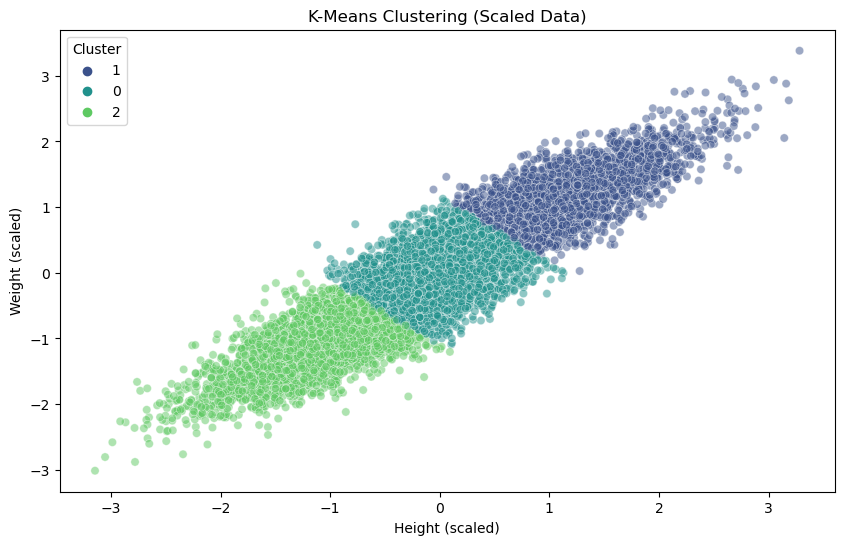

In [17]:
plt.figure(figsize=(10, 6))

# Scatter plot of clusters in scaled data
sns.scatterplot(x=data['Height'], y=data["Weight"], hue=data['Cluster'].astype(str), palette='viridis', alpha=0.5)
plt.title('K-Means Clustering (Scaled Data)')
plt.xlabel('Height (scaled)')
plt.ylabel('Weight (scaled)')
plt.show()

#### Visualizing the Clusters with Centroids in Scaled Data

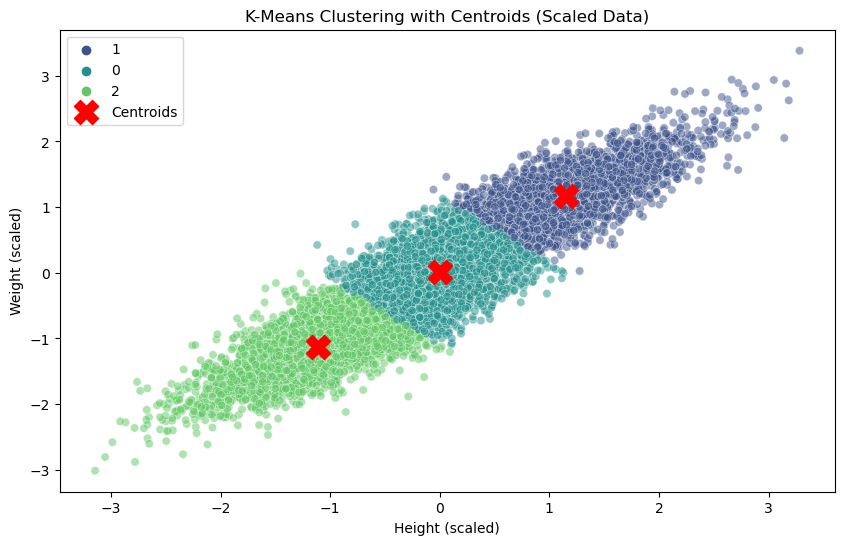

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot of clusters in scaled data
sns.scatterplot(x=data['Height'], y=data["Weight"], hue=data['Cluster'].astype(str), palette='viridis', alpha=0.5)

# Plot the centroids in scaled data
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # X-coordinate (scaled height)
    kmeans.cluster_centers_[:, 1],  # Y-coordinate (scaled weight)
    s=300, 
    c='red', 
    marker='X', 
    label='Centroids'
)

plt.title('K-Means Clustering with Centroids (Scaled Data)')
plt.xlabel('Height (scaled)')
plt.ylabel('Weight (scaled)')
plt.legend()
plt.show()


## Identifying Outliers
Examine the clusters formed by K-Means and identify data points that are not well-aligned with any cluster or are located far from the center of their assigned cluster. These data points are potential outliers.

#### Calculate distances to centroids

In [19]:
data['Distance_to_Centroid'] = np.linalg.norm(data[['Height', 'Weight']] - kmeans.cluster_centers_[kmeans.labels_], axis=1)

#### Calculate Outlier Threshold Using IQR Rule

In [20]:
Q1 = data['Distance_to_Centroid'].quantile(0.25)
Q3 = data['Distance_to_Centroid'].quantile(0.75)

IQR = Q3 - Q1

#### Set the threshold for outliers

In [21]:
outlier_threshold = 1.5 * IQR

#### Visualize distances

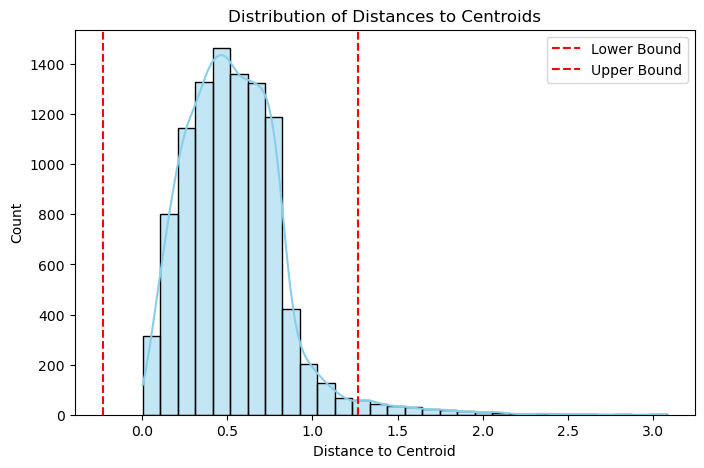

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Distance_to_Centroid'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Distances to Centroids')
plt.xlabel('Distance to Centroid')
plt.ylabel('Count')
plt.axvline(Q1 - outlier_threshold, color='red', linestyle='--', label='Lower Bound')
plt.axvline(Q3 + outlier_threshold, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

## Removing or Flagging Outliers
Decide on a strategy for handling outliers based on the goals of the analysis. Options include removing identified outliers from the dataset or flagging them for further analysis.

#### Identify and remove outliers

In [23]:
# Identify outliers
outliers = data[(data['Distance_to_Centroid'] > (Q3 + outlier_threshold)) | (data['Distance_to_Centroid'] < (Q1 - outlier_threshold))]

#### Flag outliers

In [24]:
data['Is_Outlier'] = (data['Distance_to_Centroid'] > (Q3 + outlier_threshold)) | (data['Distance_to_Centroid'] < (Q1 - outlier_threshold))

In [25]:
data[data['Is_Outlier']]

,Gender,Height,Weight,Cluster,Distance_to_Centroid,Is_Outlier
0,Male,1.944061,2.505797,1,1.559652,True
23,Male,2.297282,2.096794,1,1.479029,True
82,Male,1.938632,2.381935,1,1.451458,True
190,Male,2.688165,2.292193,1,1.907931,True
197,Male,2.489229,2.195308,1,1.690689,True
...,...,...,...,...,...,...
9775,Female,-1.648312,-2.317418,2,1.305528,True
9825,Female,-2.700144,-2.367808,2,2.015949,True
9895,Female,-2.242427,-2.111308,2,1.499393,True
9904,Female,-2.427317,-1.876168,2,1.514450,True


In [26]:
# Remove outliers
data = data[~((data['Distance_to_Centroid'] > (Q3 + outlier_threshold)) | (data['Distance_to_Centroid'] < (Q1 - outlier_threshold)))].drop(columns='Distance_to_Centroid')

In [27]:
data['Is_Outlier'].any()

False

#### Scatter plot of cleaned data

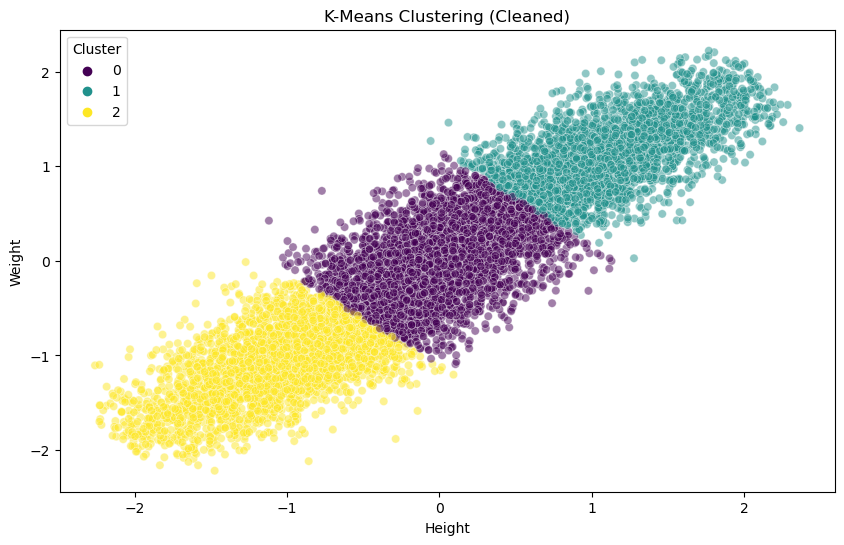

In [28]:
# Scatter plot of cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Cluster', data=data, palette='viridis', alpha=0.5)
plt.title('K-Means Clustering (Cleaned)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()